In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from sklearn.preprocessing import MinMaxScaler

In [28]:
catalog = r"NKUA_SL_thiva_sample_catalogue.cat"
df = pd.read_csv(catalog, delim_whitespace=True)
df.rename(columns={'Mag': 'Magnitude'}, inplace=True)

In [53]:
X=df.loc[:,['Lat','Long','Dep']]
X.head(10)

,Lat,Long,Dep
0,38.3115,23.3507,11.0
1,38.3202,23.3377,11.0
2,38.3067,23.3545,12.0
3,38.3153,23.3420,10.0
4,38.3130,23.3507,11.0
5,38.3098,23.3377,11.0
6,38.3050,23.3475,10.0
7,38.3212,23.3398,12.0
8,38.3238,23.3688,8.0
9,38.3253,23.3207,10.0


In [54]:
minmax = MinMaxScaler()
X[['Lat','Long','Dep']] = minmax.fit_transform(X[['Lat','Long','Dep']])

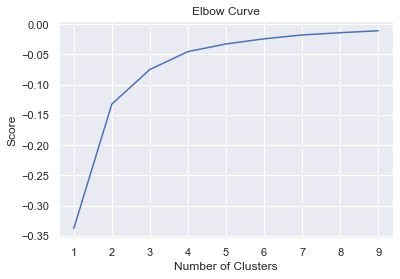

In [55]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Lat']]
X_axis = df[['Long']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [84]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,Lat,Long,Dep,cluster_label
0,0.460142,0.445228,0.357143,0
1,0.528808,0.384109,0.357143,0
2,0.422257,0.463094,0.392857,0
3,0.490134,0.404325,0.321429,0
4,0.471981,0.445228,0.357143,0
5,0.446725,0.384109,0.357143,0
6,0.408840,0.430183,0.321429,0
7,0.536701,0.393982,0.392857,0
8,0.557222,0.530324,0.250000,1
9,0.569061,0.304184,0.321429,0


In [85]:
# df[['Long','Lat']].head(10)
# df.head(10)
horizontal_concat = pd.concat([X[['cluster_label']], df[['Long','Lat']]], join ='outer', axis = 1)
horizontal_concat.head(10)


,cluster_label,Long,Lat
0,0,23.3507,38.3115
1,0,23.3377,38.3202
2,0,23.3545,38.3067
3,0,23.3420,38.3153
4,0,23.3507,38.3130
5,0,23.3377,38.3098
6,0,23.3475,38.3050
7,0,23.3398,38.3212
8,1,23.3688,38.3238
9,0,23.3207,38.3253


In [82]:
import plotly.express as px

In [86]:
fig = px.scatter(horizontal_concat, x="Lat", y="Long", color="cluster_label")
fig.show()